In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel(r"/content/HARGA RUMAH JAKSEL.xlsx")

In [ ]:
for i in df :
  print(i)

HARGA
LT
LB
JKT
JKM
GRS
KOTA


# Data Wrangling

In [ ]:
print(df.head(5))

         HARGA    LT   LB  JKT  JKM  GRS    KOTA
0  28000000000  1100  700    5    6  ADA  JAKSEL
1  19000000000   824  800    4    4  ADA  JAKSEL
2   4700000000   500  400    4    3  ADA  JAKSEL
3   4900000000   251  300    5    4  ADA  JAKSEL
4  28000000000  1340  575    4    5  ADA  JAKSEL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


Checking the values of "KOTA"

In [ ]:
df['KOTA'].unique()

array(['JAKSEL'], dtype=object)

Since 'Jakarta' is the only value for this column. It can be said that this feature will not play a significant role in our machine learning model. Thus we will drop this column from the dataframe.

In [ ]:
df = df.drop(['KOTA'], axis=1)

Next, I am going to check the values of GRS

In [ ]:
df['GRS'].unique()

array(['ADA', 'TIDAK ADA'], dtype=object)

Using the map(), I will change the value of 'ADA' into 1 and 'TIDAK ADA' into 0 to make it easier for the machine learning model.

In [ ]:
df['GRS'] = df['GRS'].map({'ADA': 1, 'TIDAK ADA': 0})

In [ ]:
df.head(5)

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,1
1,19000000000,824,800,4,4,1
2,4700000000,500,400,4,3,1
3,4900000000,251,300,5,4,1
4,28000000000,1340,575,4,5,1


In [ ]:
df['GRS'].unique()

array([1, 0])

Lastly, I am going to check if there is any missing data using sns.heatmap()

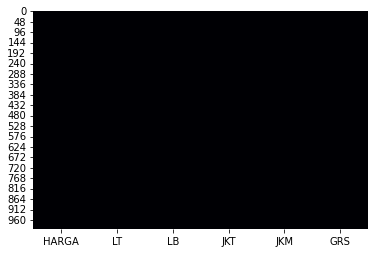

In [ ]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

Here I am going to check the relation between each variable using sns.pairplot() function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1001 non-null   int64
 1   LT      1001 non-null   int64
 2   LB      1001 non-null   int64
 3   JKT     1001 non-null   int64
 4   JKM     1001 non-null   int64
 5   GRS     1001 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


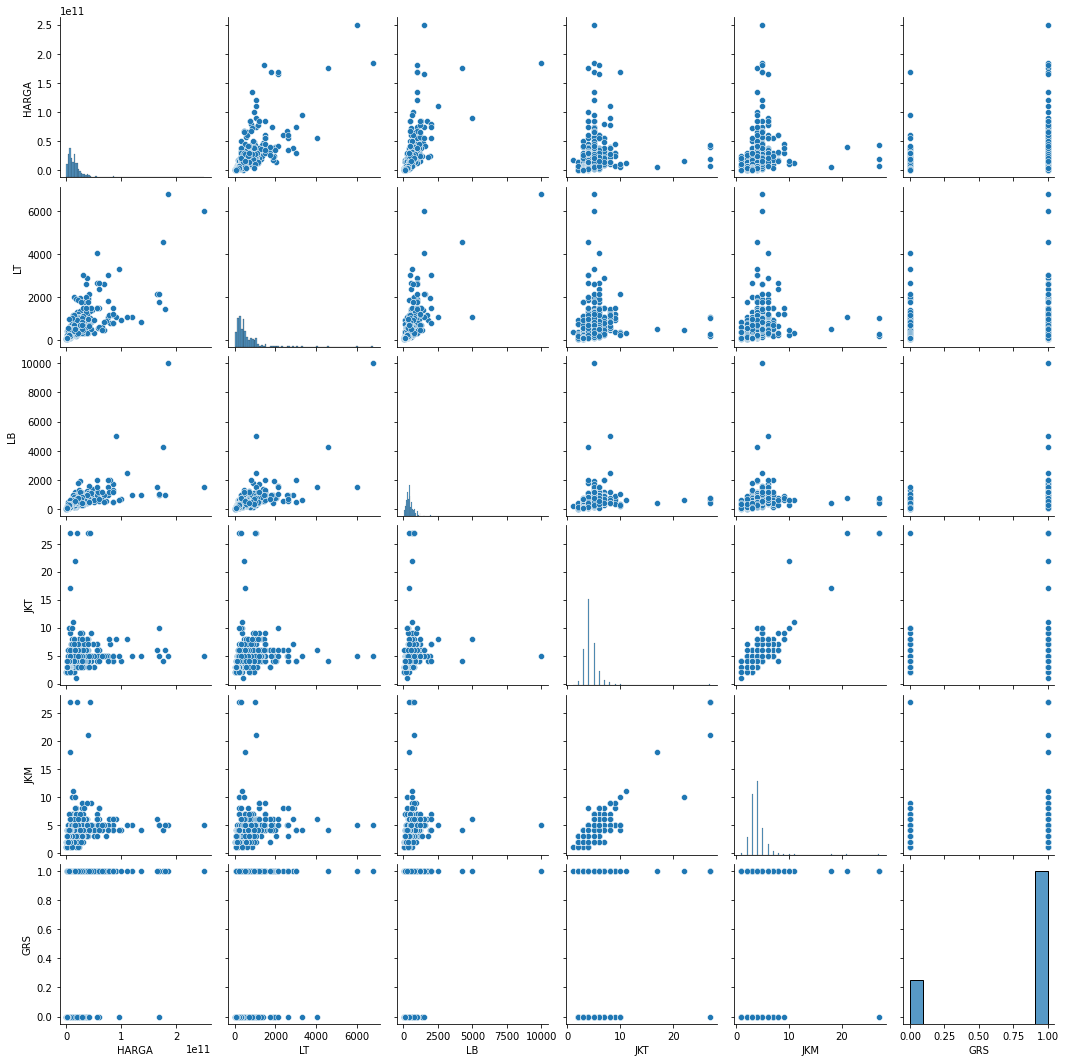

In [ ]:
sns.pairplot(df)

Using .corr(), I am going to plot the correlation between each values using seaborn heatmap fucntion.

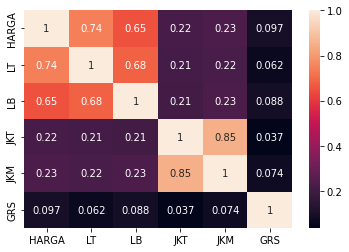

In [ ]:
sns.heatmap(df.corr(), annot=True);

Since the relationship is really low, I decided to drop some features (GRS, JKM, and JKT) from the dataset

In [ ]:
df = df.drop(['GRS', 'JKM', 'JKT'], axis=1)

Next, I am going to check the distribution of the column 'HARGA' (price)

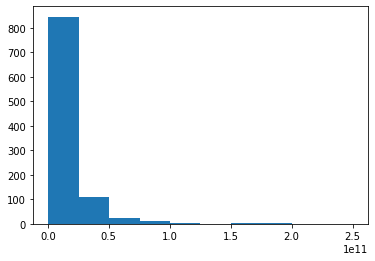

In [ ]:
plt.hist(df['HARGA'])
plt.show()

Since there are too many outliers in this column, I decided to delete the outlier using interquantile range (IQR)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
IQR, Q1, Q3

(HARGA    1.325000e+10
 LT       4.570000e+02
 LB       3.000000e+02
 dtype: float64, HARGA    6.750000e+09
 LT       2.200000e+02
 LB       3.000000e+02
 Name: 0.25, dtype: float64, HARGA    2.000000e+10
 LT       6.770000e+02
 LB       6.000000e+02
 Name: 0.75, dtype: float64)

Checking the distribution after removing the outlier

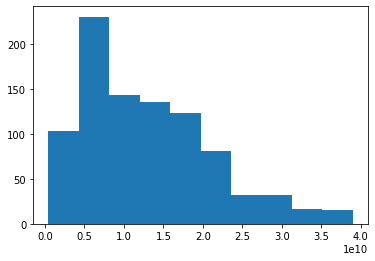

In [ ]:
plt.hist(df['HARGA'])
plt.show()

# Preparing the machine learning model

First I am going to prepare X and y values that will be used by the machine learning model

In [ ]:
X = df.drop(['HARGA'], axis=1)

In [ ]:
y = df['HARGA']

Now we have define the X and y values, I will split the data into training dataset, validation dataset, and test dataset for the Multi-Layer Perceptron Model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [31]:
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, min_samples_leaf=2, min_samples_split=2)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

In [32]:
mse, r2

(2.0538935068083425e+19, 0.6619616743757901)